In [ ]:
!pip install contractions
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install -qq numpy==1.26.4 gensim
get_ipython().kernel.do_shutdown(restart=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


{'status': 'ok', 'restart': True}

In [ ]:
import os
import pandas as pd
import numpy as np

# **Trump Tweets Dataset General Info**

In [ ]:
df = pd.read_csv('trump_tweets.csv', parse_dates=['date'])

In [ ]:
df.head(10)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
0,9.845497e+16,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02
1,1.234653e+18,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03
2,1.218011e+18,RT @CBS_Herridge: READ: Letter to surveillance...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17
3,1.304875e+18,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12
4,1.218160e+18,RT @MZHemingway: Very friendly telling of even...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17
5,1.217963e+18,RT @WhiteHouse: President @realDonaldTrump ann...,True,False,Twitter for iPhone,0,25048,2020-01-17T00:11:56Z,False,2020-01-17
6,1.223641e+18,Getting a little exercise this morning! https:...,False,False,Twitter for iPhone,285863,30209,2020-02-01T16:14:02Z,False,2020-02-01
7,1.319502e+18,https://t.co/4qwCKQOiOw,False,False,Twitter for iPhone,130822,19127,2020-10-23T04:52:14Z,False,2020-10-23
8,1.319501e+18,https://t.co/VlEu8yyovv,False,False,Twitter for iPhone,153446,20275,2020-10-23T04:46:53Z,False,2020-10-23
9,1.319501e+18,https://t.co/z5CRqHO8vg,False,False,Twitter for iPhone,102150,14815,2020-10-23T04:46:49Z,False,2020-10-23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          56571 non-null  float64       
 1   text        56571 non-null  object        
 2   is_retweet  56571 non-null  bool          
 3   is_deleted  56571 non-null  bool          
 4   device      56571 non-null  object        
 5   favorites   56571 non-null  int64         
 6   retweets    56571 non-null  int64         
 7   datetime    56571 non-null  object        
 8   is_flagged  56571 non-null  bool          
 9   date        56571 non-null  datetime64[ns]
dtypes: bool(3), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.2+ MB


# **GoEmotions Dataset Preprocessing**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving go_emotions_dataset.csv to go_emotions_dataset.csv


In [ ]:
go_emotions = pd.read_csv('go_emotions_dataset.csv')

In [ ]:
go_emotions.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
go_emotions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58011 entries, 0 to 211161
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    58011 non-null  object
 1   text                  58011 non-null  object
 2   example_very_unclear  58011 non-null  bool  
 3   admiration            58011 non-null  int64 
 4   amusement             58011 non-null  int64 
 5   anger                 58011 non-null  int64 
 6   annoyance             58011 non-null  int64 
 7   approval              58011 non-null  int64 
 8   caring                58011 non-null  int64 
 9   confusion             58011 non-null  int64 
 10  curiosity             58011 non-null  int64 
 11  desire                58011 non-null  int64 
 12  disappointment        58011 non-null  int64 
 13  disapproval           58011 non-null  int64 
 14  disgust               58011 non-null  int64 
 15  embarrassment         58011 non-null  in

In [ ]:
go_emotions.drop_duplicates(subset='id', inplace=True)

In [ ]:
go_emotions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58011 entries, 0 to 211161
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    58011 non-null  object
 1   text                  58011 non-null  object
 2   example_very_unclear  58011 non-null  bool  
 3   admiration            58011 non-null  int64 
 4   amusement             58011 non-null  int64 
 5   anger                 58011 non-null  int64 
 6   annoyance             58011 non-null  int64 
 7   approval              58011 non-null  int64 
 8   caring                58011 non-null  int64 
 9   confusion             58011 non-null  int64 
 10  curiosity             58011 non-null  int64 
 11  desire                58011 non-null  int64 
 12  disappointment        58011 non-null  int64 
 13  disapproval           58011 non-null  int64 
 14  disgust               58011 non-null  int64 
 15  embarrassment         58011 non-null  in

In [ ]:
neg_cols = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"
]
pos_cols = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief"
]
neu_cols = ["confusion", "realization", "surprise", "neutral"]

In [ ]:
go_emotions["pos_sum"] = go_emotions[pos_cols].sum(axis=1)
go_emotions["neg_sum"] = go_emotions[neg_cols].sum(axis=1)
go_emotions["neu_sum"] = go_emotions[neu_cols].sum(axis=1)

go_emotions["sentiment"] = go_emotions[["pos_sum", "neg_sum", "neu_sum"]].idxmax(axis=1)

go_emotions["sentiment"] = go_emotions["sentiment"].map({
    "pos_sum": "positive",
    "neg_sum": "negative",
    "neu_sum": "neutral"
})

go_emotions.drop(columns=["pos_sum", "neg_sum", "neu_sum"], inplace=True)


In [ ]:
go_emotions.head(20)

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,sentiment
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,neutral
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,neutral
5,eespn2i,Right? Considering it’s such an important docu...,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
6,eczuekb,"He isn't as big, but he's still quite popular....",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
7,ed5tx8y,That's crazy; I went to a super [RELIGION] hig...,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
8,ef961hv,that's adorable asf,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
9,edl7cr3,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [ ]:
sen_df = go_emotions[['text', 'sentiment']]

In [ ]:
sen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58011 entries, 0 to 211161
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       58011 non-null  object
 1   sentiment  58011 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [ ]:
sen_df.head()

,text,sentiment
0,That game hurt.,negative
1,>sexuality shouldn’t be a grouping category I...,positive
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,positive
4,"[NAME] was nowhere near them, he was by the Fa...",neutral


In [ ]:
sen_df['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
positive,0.450846
neutral,0.330351
negative,0.218803


In [ ]:
#Source: https://www.kaggle.com/code/esknight/emotion-classification-final

import re
import contractions

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
sen_df["text"] = sen_df["text"].apply(clean_text)

<ipython-input-10-7defad26cea9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sen_df["text"] = sen_df["text"].apply(clean_text)


In [ ]:
sen_df.head(30)

,text,sentiment
0,that game hurt.,negative
1,sexuality should not be a grouping category i...,positive
2,"you do right, if you do not care then fuck them!",neutral
3,man i love reddit.,positive
4,"name was nowhere near them, he was by the falc...",neutral
5,right? considering its such an important docum...,positive
6,"he is not as big, but he is still quite popula...",negative
7,that is crazy i went to a super religion high ...,positive
8,that is adorable asf,positive
9,sponge blurb pubs quaw haha gurr ha aaa! final...,positive


In [ ]:
sen_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58011 entries, 0 to 211161
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   text                58011 non-null  object
 1   sentiment_negative  58011 non-null  int64 
 2   sentiment_neutral   58011 non-null  int64 
 3   sentiment_positive  58011 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.2+ MB


# **Training RoBERTa Classifier - MODEL 1**

In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
sen_df['labels'] = sen_df['sentiment'].map({'positive': 0, 'negative': 1, 'neutral': 2})


In [ ]:
sen_df.head()

,text,sentiment,labels
0,that game hurt.,negative,1
1,sexuality should not be a grouping category i...,positive,0
2,"you do right, if you do not care then fuck them!",neutral,2
3,man i love reddit.,positive,0
4,"name was nowhere near them, he was by the falc...",neutral,2


In [ ]:
dataset = Dataset.from_pandas(sen_df[['text', 'labels']])


In [ ]:
dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/38079 [00:00<?, ? examples/s]

In [ ]:
split1 = dataset.train_test_split(test_size=0.1, seed=2)
train_val_dataset = split1['train']
test_dataset = split1['test']


split2 = train_val_dataset.train_test_split(test_size=0.1, seed=2)
train_dataset = split2['train']
val_dataset = split2['test']


In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    fp16=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    logging_dir='./logs',
    do_train=True,
    do_eval=True,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed=2,
    report_to = None

)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    precision = precision_score(p.label_ids,preds,average='macro')
    recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'Accuracy': acc,
      'Precision': precision,
      'Recall' : recall,
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Precision,Recall
1,0.647500,0.800278,0.650806,0.663857,0.650511,0.651120
2,0.569800,0.849293,0.643039,0.657920,0.640592,0.649239
3,0.478900,0.992269,0.629699,0.647960,0.631975,0.630675


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=8811, training_loss=0.5655645470710662, metrics={'train_runtime': 3909.4001, 'train_samples_per_second': 36.058, 'train_steps_per_second': 2.254, 'total_flos': 3.892815637969306e+16, 'train_loss': 0.5655645470710662, 'epoch': 3.0})

In [ ]:
trainer.save_model("./RoBERTa_FineTuned")
tokenizer.save_pretrained("./RoBERTa_FineTuned")
!zip -r RoBERTa_FineTuned.zip ./RoBERTa_FineTuned

from google.colab import files
files.download("RoBERTa_FineTuned.zip")

  adding: RoBERTa_FineTuned/ (stored 0%)
  adding: RoBERTa_FineTuned/tokenizer_config.json (deflated 76%)
  adding: RoBERTa_FineTuned/config.json (deflated 52%)
  adding: RoBERTa_FineTuned/vocab.json (deflated 68%)
  adding: RoBERTa_FineTuned/merges.txt (deflated 53%)
  adding: RoBERTa_FineTuned/special_tokens_map.json (deflated 84%)
  adding: RoBERTa_FineTuned/model.safetensors (deflated 12%)
  adding: RoBERTa_FineTuned/training_args.bin (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!unzip RoBERTa_FineTuned.zip -d RoBERTa_FineTuned

Archive:  RoBERTa_FineTuned.zip
   creating: RoBERTa_FineTuned/RoBERTa_FineTuned/
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/tokenizer_config.json  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/config.json  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/vocab.json  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/merges.txt  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/special_tokens_map.json  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/model.safetensors  
  inflating: RoBERTa_FineTuned/RoBERTa_FineTuned/training_args.bin  


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained("./RoBERTa_FineTuned/RoBERTa_FineTuned")
tokenizer = RobertaTokenizer.from_pretrained("./RoBERTa_FineTuned/RoBERTa_FineTuned")

In [ ]:
predictions = trainer.predict(test_dataset)

preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, preds, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.72      0.71      0.72      2590
     neutral       0.57      0.63      0.60      1267
    positive       0.58      0.55      0.56      1945

    accuracy                           0.64      5802
   macro avg       0.62      0.63      0.63      5802
weighted avg       0.64      0.64      0.64      5802



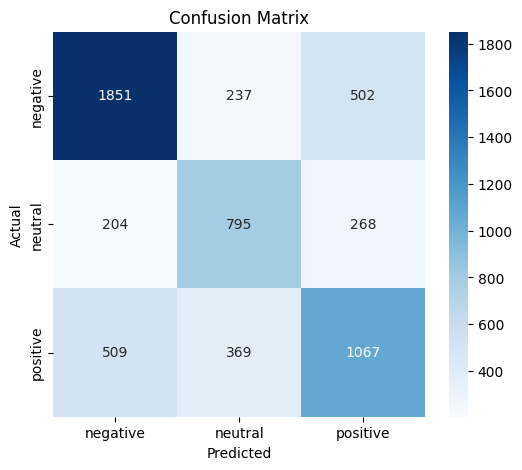

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Training RoBERTa Classifier (Undersampling) - MODEL 2**




In [ ]:
go_emotions = pd.read_csv('go_emotions_dataset.csv')

In [ ]:
go_emotions.drop_duplicates(subset='id', inplace=True)

In [ ]:
neg_cols = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"
]
pos_cols = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief"
]
neu_cols = ["confusion", "realization", "surprise", "neutral"]

In [ ]:
go_emotions["pos_sum"] = go_emotions[pos_cols].sum(axis=1)
go_emotions["neg_sum"] = go_emotions[neg_cols].sum(axis=1)
go_emotions["neu_sum"] = go_emotions[neu_cols].sum(axis=1)

go_emotions["sentiment"] = go_emotions[["pos_sum", "neg_sum", "neu_sum"]].idxmax(axis=1)

go_emotions["sentiment"] = go_emotions["sentiment"].map({
    "pos_sum": "positive",
    "neg_sum": "negative",
    "neu_sum": "neutral"
})

go_emotions.drop(columns=["pos_sum", "neg_sum", "neu_sum"], inplace=True)


In [ ]:
sen_df = go_emotions[['text', 'sentiment']]

In [ ]:
sen_df['sentiment'].value_counts()

,count
sentiment,
positive,26154
neutral,19164
negative,12693


In [ ]:
min_size = sen_df['sentiment'].value_counts().min()
sen_df = sen_df.groupby('sentiment').apply(lambda x: x.sample(min_size)).reset_index(drop=True)

<ipython-input-10-85cf0874bed8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sen_df = sen_df.groupby('sentiment').apply(lambda x: x.sample(min_size)).reset_index(drop=True)


In [ ]:
sen_df['sentiment'].value_counts()

,count
sentiment,
positive,26154
neutral,19164
negative,12693


In [ ]:
#Source: https://www.kaggle.com/code/esknight/emotion-classification-final

import re
import contractions

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
sen_df["text"] = sen_df["text"].apply(clean_text)

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
sen_df['labels'] = sen_df['sentiment'].map({'positive': 0, 'negative': 1, 'neutral': 2})

In [ ]:
dataset = Dataset.from_pandas(sen_df[['text', 'labels']])

In [ ]:
dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/38079 [00:00<?, ? examples/s]

In [ ]:
split1 = dataset.train_test_split(test_size=0.1, seed=2)
train_val_dataset = split1['train']
test_dataset = split1['test']


split2 = train_val_dataset.train_test_split(test_size=0.1, seed=2)
train_dataset = split2['train']
val_dataset = split2['test']

In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    fp16=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    logging_dir='./logs',
    do_train=True,
    do_eval=True,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed=2,
    report_to = None

)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    precision = precision_score(p.label_ids,preds,average='macro')
    recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'Accuracy': acc,
      'Precision': precision,
      'Recall' : recall,
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

NameError: name 'train_dataset' is not defined

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Precision,Recall
1,0.810300,0.774719,0.651005,0.655193,0.652288,0.653180
2,0.726300,0.780414,0.649884,0.656651,0.652143,0.654337
3,0.633100,0.827965,0.644019,0.650817,0.645497,0.648480


TrainOutput(global_step=5784, training_loss=0.7326386083705791, metrics={'train_runtime': 2526.9975, 'train_samples_per_second': 36.616, 'train_steps_per_second': 2.289, 'total_flos': 2.434562142895411e+16, 'train_loss': 0.7326386083705791, 'epoch': 3.0})

In [ ]:
trainer.save_model("./RoBERTa_FineTuned_Undersampling")
tokenizer.save_pretrained("./RoBERTa_FineTuned_Undersampling")
!zip -r RoBERTa_FineTuned_Undersampling.zip ./RoBERTa_FineTuned_Undersampling

from google.colab import files
files.download("RoBERTa_FineTuned_Undersampling.zip")


  adding: RoBERTa_FineTuned_Undersampling/ (stored 0%)
  adding: RoBERTa_FineTuned_Undersampling/special_tokens_map.json (deflated 84%)
  adding: RoBERTa_FineTuned_Undersampling/vocab.json (deflated 68%)
  adding: RoBERTa_FineTuned_Undersampling/config.json (deflated 52%)
  adding: RoBERTa_FineTuned_Undersampling/model.safetensors (deflated 12%)
  adding: RoBERTa_FineTuned_Undersampling/training_args.bin (deflated 52%)
  adding: RoBERTa_FineTuned_Undersampling/merges.txt (deflated 53%)
  adding: RoBERTa_FineTuned_Undersampling/tokenizer_config.json (deflated 76%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = trainer.predict(test_dataset)

preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, preds, target_names=['negative', 'neutral', 'positive']))

              precision    recall  f1-score   support

    negative       0.78      0.69      0.73      2590
     neutral       0.54      0.77      0.64      1267
    positive       0.62      0.54      0.57      1945

    accuracy                           0.66      5802
   macro avg       0.65      0.67      0.65      5802
weighted avg       0.67      0.66      0.66      5802



In [ ]:
from sklearn.metrics import log_loss
from scipy.special import softmax

logits = predictions.predictions
labels = predictions.label_ids


probs = softmax(logits, axis=1)


loss = log_loss(labels, probs)
print("Log Loss:", loss)

Log Loss: 0.7704073736826978


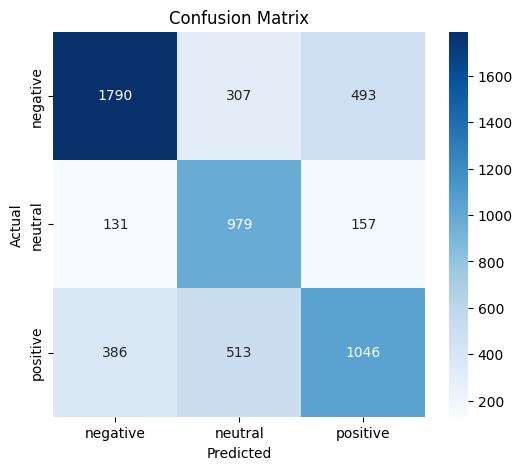

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Predicting Trump's Tweets Sentiment**





In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
!unzip RoBERTa_FineTuned_Undersampling.zip -d RoBERTa_FineTuned_Undersampling

Archive:  RoBERTa_FineTuned_Undersampling.zip
   creating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/special_tokens_map.json  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/vocab.json  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/config.json  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/model.safetensors  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/training_args.bin  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/merges.txt  
  inflating: RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling/tokenizer_config.json  


In [ ]:
import re
import contractions

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
df['text'] = df['text'].apply(clean_text)

NameError: name 'df' is not defined

In [ ]:
df.head()

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date
0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02
1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03
2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17
3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12
4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained("./RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling")
tokenizer = RobertaTokenizer.from_pretrained("./RoBERTa_FineTuned_Undersampling/RoBERTa_FineTuned_Undersampling")

In [ ]:
hf_dataset = Dataset.from_pandas(df[["text"]])

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
tokenized_dataset = hf_dataset.map(tokenize, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

Map:   0%|          | 0/56571 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)


<ipython-input-22-5ff58158d532>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
predictions = trainer.predict(tokenized_dataset)
preds = np.argmax(predictions.predictions, axis=1)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
df["sentiment"] = preds

In [ ]:
id2label = {0: "positive", 1: "negative", 2: "neutral"}
df["sentiment"] = df["sentiment"].map(id2label)

In [ ]:
import torch.nn.functional as F

probs = F.softmax(torch.tensor(predictions.predictions), dim=1).numpy()

df["prob_positive"] = probs[:, 0]
df["prob_negative"] = probs[:, 1]
df["prob_neutral"]  = probs[:, 2]


In [ ]:
df.head(10)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral
0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305
1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323
2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729
3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568
4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108
5,1.217963e+18,rt whitehouse president realdonaldtrump announ...,True,False,Twitter for iPhone,0,25048,2020-01-17T00:11:56Z,False,2020-01-17,neutral,0.303217,0.056034,0.640749
6,1.223641e+18,getting a little exercise this morning! [url],False,False,Twitter for iPhone,285863,30209,2020-02-01T16:14:02Z,False,2020-02-01,neutral,0.331158,0.039277,0.629565
7,1.319502e+18,[url],False,False,Twitter for iPhone,130822,19127,2020-10-23T04:52:14Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854
8,1.319501e+18,[url],False,False,Twitter for iPhone,153446,20275,2020-10-23T04:46:53Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854
9,1.319501e+18,[url],False,False,Twitter for iPhone,102150,14815,2020-10-23T04:46:49Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854


In [ ]:
df.to_csv('trump_tweets_with_sentiment.csv')

In [ ]:
from google.colab import files
files.download("trump_tweets_with_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Fine-Grained RoBERTa Training - MODEL 3**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving go_emotions_dataset.csv to go_emotions_dataset.csv


In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
go_emotions = pd.read_csv('go_emotions_dataset.csv')

In [ ]:
go_emotions.head()

,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
go_emotions.drop_duplicates(subset='id', inplace=True)

In [ ]:
go_emotions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58011 entries, 0 to 211161
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    58011 non-null  object
 1   text                  58011 non-null  object
 2   example_very_unclear  58011 non-null  bool  
 3   admiration            58011 non-null  int64 
 4   amusement             58011 non-null  int64 
 5   anger                 58011 non-null  int64 
 6   annoyance             58011 non-null  int64 
 7   approval              58011 non-null  int64 
 8   caring                58011 non-null  int64 
 9   confusion             58011 non-null  int64 
 10  curiosity             58011 non-null  int64 
 11  desire                58011 non-null  int64 
 12  disappointment        58011 non-null  int64 
 13  disapproval           58011 non-null  int64 
 14  disgust               58011 non-null  int64 
 15  embarrassment         58011 non-null  in

In [ ]:
emotion_columns = go_emotions.columns[3:]
print(go_emotions[emotion_columns].dtypes)

admiration        int64
amusement         int64
anger             int64
annoyance         int64
approval          int64
caring            int64
confusion         int64
curiosity         int64
desire            int64
disappointment    int64
disapproval       int64
disgust           int64
embarrassment     int64
excitement        int64
fear              int64
gratitude         int64
grief             int64
joy               int64
love              int64
nervousness       int64
optimism          int64
pride             int64
realization       int64
relief            int64
remorse           int64
sadness           int64
surprise          int64
neutral           int64
dtype: object


In [ ]:
go_emotions['sentiment'] = go_emotions[emotion_columns].idxmax(axis=1)

In [ ]:
sen_df_1 = go_emotions[['text', 'sentiment']]

In [ ]:
sen_df_1.head(20)

,text,sentiment
0,That game hurt.,sadness
1,>sexuality shouldn’t be a grouping category I...,admiration
2,"You do right, if you don't care then fuck 'em!",neutral
3,Man I love reddit.,love
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
5,Right? Considering it’s such an important docu...,gratitude
6,"He isn't as big, but he's still quite popular....",disapproval
7,That's crazy; I went to a super [RELIGION] hig...,amusement
8,that's adorable asf,amusement
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",amusement


In [ ]:
sen_df_1['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
neutral,0.267587
admiration,0.098378
approval,0.073417
annoyance,0.051852
gratitude,0.044457
amusement,0.043440
disapproval,0.041596
curiosity,0.037993
anger,0.037700


In [ ]:
#Source: https://www.kaggle.com/code/esknight/emotion-classification-final

import re
import contractions

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
sen_df_1["text"] = sen_df_1["text"].apply(clean_text)

<ipython-input-43-c5b7fadf42ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sen_df_1["text"] = sen_df_1["text"].apply(clean_text)


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
sentiment_labels = sen_df_1['sentiment'].unique()
label_to_int = {label: idx for idx, label in enumerate(sorted(sentiment_labels))}

sen_df_1['labels'] = sen_df_1['sentiment'].map(label_to_int)

<ipython-input-19-872a57d088e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sen_df_1['labels'] = sen_df_1['sentiment'].map(label_to_int)


In [ ]:
sen_df_1.head(15)

,text,sentiment,labels
0,that game hurt.,sadness,26
1,sexuality should not be a grouping category i...,admiration,0
2,"you do right, if you do not care then fuck them!",neutral,20
3,man i love reddit.,love,18
4,"name was nowhere near them, he was by the falc...",neutral,20
5,right? considering its such an important docum...,gratitude,15
6,"he is not as big, but he is still quite popula...",disapproval,10
7,that is crazy i went to a super religion high ...,amusement,1
8,that is adorable asf,amusement,1
9,sponge blurb pubs quaw haha gurr ha aaa! final...,amusement,1


In [ ]:
dataset = Dataset.from_pandas(sen_df_1[['text', 'labels']])

In [ ]:
dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/58011 [00:00<?, ? examples/s]

In [ ]:
split1 = dataset.train_test_split(test_size=0.1, seed=2)
train_val_dataset = split1['train']
test_dataset = split1['test']


split2 = train_val_dataset.train_test_split(test_size=0.1, seed=2)
train_dataset = split2['train']
val_dataset = split2['test']

In [ ]:
sen_df_1['labels'].nunique()

28

In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=28)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    fp16=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    logging_dir='./logs',
    do_train=True,
    do_eval=True,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed=2,
    report_to = None

)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    precision = precision_score(p.label_ids,preds,average='macro')
    recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'Accuracy': acc,
      'Precision': precision,
      'Recall' : recall,
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Precision,Recall
1,1.974000,1.881605,0.295581,0.445892,0.359981,0.304056
2,1.817200,1.849811,0.313002,0.451829,0.361750,0.314713
3,1.695200,1.862778,0.328048,0.451255,0.345604,0.334665


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=8811, training_loss=1.8594939808016968, metrics={'train_runtime': 3944.4807, 'train_samples_per_second': 35.737, 'train_steps_per_second': 2.234, 'total_flos': 3.709784503767859e+16, 'train_loss': 1.8594939808016968, 'epoch': 3.0})

In [ ]:
trainer.save_model("./RoBERTa_FineTuned_ALL_EMOTIONS")
tokenizer.save_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS")
!zip -r RoBERTa_FineTuned_ALL_EMOTIONS.zip ./RoBERTa_FineTuned_ALL_EMOTIONS

from google.colab import files
files.download("RoBERTa_FineTuned_ALL_EMOTIONS.zip")

  adding: RoBERTa_FineTuned_ALL_EMOTIONS/ (stored 0%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/vocab.json (deflated 68%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/merges.txt (deflated 53%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/training_args.bin (deflated 52%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/model.safetensors (deflated 12%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/tokenizer_config.json (deflated 76%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/config.json (deflated 66%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS/special_tokens_map.json (deflated 84%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predictions = trainer.predict(test_dataset)

preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
int_to_label = {v: k for k, v in label_to_int.items()}
target_names = [int_to_label[i] for i in range(len(int_to_label))]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(labels, preds, target_names=target_names))

                precision    recall  f1-score   support

    admiration       0.53      0.55      0.54       525
     amusement       0.56      0.78      0.65       268
         anger       0.39      0.48      0.43       224
     annoyance       0.21      0.14      0.17       304
      approval       0.33      0.20      0.25       434
        caring       0.29      0.40      0.33       121
     confusion       0.41      0.25      0.31       201
     curiosity       0.36      0.47      0.41       227
        desire       0.25      0.20      0.22        81
disappointment       0.24      0.20      0.22       148
   disapproval       0.29      0.26      0.27       246
       disgust       0.27      0.33      0.30        91
 embarrassment       0.56      0.20      0.30        49
    excitement       0.35      0.24      0.29       137
          fear       0.39      0.47      0.42        77
     gratitude       0.64      0.76      0.70       232
         grief       0.00      0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Predicting Trump's Tweets Emotions**

In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
df = pd.read_csv('trump_tweets_with_sentiment.csv', parse_dates=['date'])

In [ ]:
df.head()

,Unnamed: 0,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral
0,0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49.0,255.0,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305
1,1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748.0,17404.0,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323
2,2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0.0,7396.0,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729
3,3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527.0,23502.0,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568
4,4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0.0,9081.0,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108


In [ ]:
!unzip RoBERTa_FineTuned_ALL_EMOTIONS.zip -d RoBERTa_FineTuned_ALL_EMOTIONS

Archive:  RoBERTa_FineTuned_ALL_EMOTIONS.zip
   creating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/vocab.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/merges.txt  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/training_args.bin  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/model.safetensors  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/tokenizer_config.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/config.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS/special_tokens_map.json  


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS")
tokenizer = RobertaTokenizer.from_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS/RoBERTa_FineTuned_ALL_EMOTIONS")

In [ ]:
hf_dataset = Dataset.from_pandas(df[["text"]])

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
tokenized_dataset = hf_dataset.map(tokenize, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

Map:   0%|          | 0/56571 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)

<ipython-input-10-5ff58158d532>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
predictions = trainer.predict(tokenized_dataset)
preds = np.argmax(predictions.predictions, axis=1)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
df["emotion"] = preds

In [ ]:
int_to_label = {v: k for k, v in label_to_int.items()}
target_names = [int_to_label[i] for i in range(len(int_to_label))]

In [ ]:
df['emotion'] = [int_to_label[p] for p in preds]


In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.head()

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral,emotion
0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305,neutral
1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323,admiration
2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729,neutral
3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568,disappointment
4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             56571 non-null  float64       
 1   text           56571 non-null  object        
 2   is_retweet     56571 non-null  bool          
 3   is_deleted     56571 non-null  bool          
 4   device         56571 non-null  object        
 5   favorites      56571 non-null  int64         
 6   retweets       56571 non-null  int64         
 7   datetime       56571 non-null  object        
 8   is_flagged     56571 non-null  bool          
 9   date           56571 non-null  datetime64[ns]
 10  sentiment      56571 non-null  object        
 11  prob_positive  56571 non-null  float64       
 12  prob_negative  56571 non-null  float64       
 13  prob_neutral   56571 non-null  float64       
 14  emotion        56571 non-null  object        
dtypes: bool(3), datetim

In [ ]:
df.to_csv('trump_tweets_with_sentiment_and_emotions.csv')

In [ ]:
from google.colab import files
files.download("trump_tweets_with_sentiment_and_emotions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Fine-Grained RoBERTa Training (No Neutral) - MODEL 4**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving go_emotions_dataset.csv to go_emotions_dataset.csv


In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
go_emotions = pd.read_csv('go_emotions_dataset.csv')

In [ ]:
go_emotions.drop_duplicates(subset='id', inplace=True)

In [ ]:
emotion_columns = go_emotions.columns[3:]
print(go_emotions[emotion_columns].dtypes)

admiration        int64
amusement         int64
anger             int64
annoyance         int64
approval          int64
caring            int64
confusion         int64
curiosity         int64
desire            int64
disappointment    int64
disapproval       int64
disgust           int64
embarrassment     int64
excitement        int64
fear              int64
gratitude         int64
grief             int64
joy               int64
love              int64
nervousness       int64
optimism          int64
pride             int64
realization       int64
relief            int64
remorse           int64
sadness           int64
surprise          int64
neutral           int64
dtype: object


In [ ]:
go_emotions['sentiment'] = go_emotions[emotion_columns].idxmax(axis=1)

In [ ]:
sen_df_2 = go_emotions[['text', 'sentiment']]

sen_df_2['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
neutral,0.267587
admiration,0.098378
approval,0.073417
annoyance,0.051852
gratitude,0.044457
amusement,0.043440
disapproval,0.041596
curiosity,0.037993
anger,0.037700


In [ ]:
#Source: https://www.kaggle.com/code/esknight/emotion-classification-final

import re
import contractions

def clean_text(text):
  re_number = re.compile('[0-9]+')
  re_url = re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
  re_tag = re.compile('\[[A-Z]+\]')
  re_char = re.compile('[^0-9a-zA-Z\s?!.,:\'\"//]+')
  re_char_clean = re.compile('[^0-9a-zA-Z\s?!.,\[\]]')
  re_punc = re.compile('[?!,.\'\"]')

  text = re.sub(re_char, "", text) # Remove unknown character
  text = contractions.fix(text) # Expand contraction
  text = re.sub(re_url, ' [url] ', text) # Replace URL with number
  text = re.sub(re_char_clean, "", text) # Only alphanumeric and punctuations.
  #text = re.sub(re_punc, "", text) # Remove punctuation.
  text = text.lower() # Lower text
  text = " ".join([w for w in text.split(' ') if w != " "]) # Remove whitespace

  return text

In [ ]:
sen_df_2["text"] = sen_df_2["text"].apply(clean_text)

<ipython-input-20-fcc5d37543ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sen_df_2["text"] = sen_df_2["text"].apply(clean_text)


In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
sen_df_2 = sen_df_2[sen_df_2['sentiment'] != 'neutral']

In [ ]:
sentiment_labels = sen_df_2['sentiment'].unique()

In [ ]:
sentiment_labels.shape

(27,)

In [ ]:
label_to_int = {label: idx for idx, label in enumerate(sorted(sentiment_labels))}

sen_df_2['labels'] = sen_df_2['sentiment'].map(label_to_int)


In [ ]:
dataset = Dataset.from_pandas(sen_df_2[['text', 'labels']])

In [ ]:
dataset = dataset.map(tokenize, batched=True)

Map:   0%|          | 0/42488 [00:00<?, ? examples/s]

In [ ]:
split1 = dataset.train_test_split(test_size=0.1, seed=2)
train_val_dataset = split1['train']
test_dataset = split1['test']


split2 = train_val_dataset.train_test_split(test_size=0.1, seed=2)
train_dataset = split2['train']
val_dataset = split2['test']

In [ ]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=27)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    fp16=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    gradient_accumulation_steps=2,
    logging_dir='./logs',
    do_train=True,
    do_eval=True,
    eval_strategy='epoch',
    save_strategy='epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed=2,
    report_to = None

)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,  precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)
    macro_f1 = f1_score(p.label_ids,preds,average='macro')
    precision = precision_score(p.label_ids,preds,average='macro')
    recall = recall_score(p.label_ids,preds,average='macro')
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'Accuracy': acc,
      'Precision': precision,
      'Recall' : recall,
    }


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Precision,Recall
1,1.964500,1.951001,0.349256,0.453190,0.399468,0.360522


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy,Precision,Recall
1,1.964500,1.951001,0.349256,0.453190,0.399468,0.360522
2,1.788700,1.904108,0.362817,0.455805,0.376444,0.367741
3,1.626800,1.917218,0.367583,0.453975,0.374026,0.373302


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=6453, training_loss=1.8619681476124235, metrics={'train_runtime': 2942.4112, 'train_samples_per_second': 35.089, 'train_steps_per_second': 2.193, 'total_flos': 2.71709984777472e+16, 'train_loss': 1.8619681476124235, 'epoch': 3.0})

In [ ]:
trainer.save_model("./RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral")
tokenizer.save_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral")
!zip -r RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral.zip ./RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral

from google.colab import files
files.download("RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral.zip")

  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/ (stored 0%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/model.safetensors (deflated 12%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/vocab.json (deflated 68%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/tokenizer_config.json (deflated 76%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/config.json (deflated 65%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/merges.txt (deflated 53%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/special_tokens_map.json (deflated 84%)
  adding: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/training_args.bin (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.metrics import classification_report

predictions = trainer.predict(test_dataset)

preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

int_to_label = {v: k for k, v in label_to_int.items()}
target_names = [int_to_label[i] for i in range(len(int_to_label))]

print(classification_report(labels, preds, target_names=target_names))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                precision    recall  f1-score   support

    admiration       0.57      0.59      0.58       593
     amusement       0.59      0.75      0.66       245
         anger       0.37      0.50      0.43       213
     annoyance       0.24      0.24      0.24       296
      approval       0.41      0.37      0.39       437
        caring       0.34      0.41      0.38       124
     confusion       0.34      0.28      0.31       180
     curiosity       0.48      0.58      0.53       224
        desire       0.45      0.37      0.41        78
disappointment       0.27      0.23      0.25       170
   disapproval       0.41      0.41      0.41       245
       disgust       0.16      0.14      0.15        77
 embarrassment       0.23      0.13      0.17        38
    excitement       0.35      0.25      0.29       117
          fear       0.38      0.56      0.45        59
     gratitude       0.73      0.69      0.71       266
         grief       0.00      0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Predicting Trump's Tweets Emotions (No Neutral)**

In [ ]:
import torch
from transformers import RobertaTokenizer
from datasets import Dataset

In [ ]:
df = pd.read_csv('trump_tweets_with_sentiment.csv', parse_dates=['date'])

In [ ]:
df.head()

,Unnamed: 0,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral
0,0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49.0,255.0,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305
1,1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748.0,17404.0,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323
2,2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0.0,7396.0,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729
3,3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527.0,23502.0,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568
4,4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0.0,9081.0,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108


In [ ]:
!unzip RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral.zip -d RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral

Archive:  RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral.zip
   creating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/model.safetensors  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/vocab.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/tokenizer_config.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/config.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/merges.txt  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/special_tokens_map.json  
  inflating: RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/training_args.bin  


In [ ]:
from transformers import RobertaForSequenceClassification, RobertaTokenizer

model = RobertaForSequenceClassification.from_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral")
tokenizer = RobertaTokenizer.from_pretrained("./RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral/RoBERTa_FineTuned_ALL_EMOTIONS_no_neutral")

In [ ]:
hf_dataset = Dataset.from_pandas(df[["text"]])

In [ ]:
def tokenize(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

In [ ]:
tokenized_dataset = hf_dataset.map(tokenize, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask'])

Map:   0%|          | 0/56571 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    tokenizer=tokenizer,
)


<ipython-input-11-5ff58158d532>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
predictions = trainer.predict(tokenized_dataset)
preds = np.argmax(predictions.predictions, axis=1)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antoniolupuz (antoniolupuz-universit-degli-studi-di-milano) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
df["emotion"] = preds

In [ ]:
int_to_label = {v: k for k, v in label_to_int.items()}
df['emotion'] = [int_to_label[p] for p in preds]


In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.head(20)

,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral,emotion
0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305,disappointment
1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323,admiration
2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729,annoyance
3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568,disappointment
4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108,admiration
5,1.217963e+18,rt whitehouse president realdonaldtrump announ...,True,False,Twitter for iPhone,0,25048,2020-01-17T00:11:56Z,False,2020-01-17,neutral,0.303217,0.056034,0.640749,admiration
6,1.223641e+18,getting a little exercise this morning! [url],False,False,Twitter for iPhone,285863,30209,2020-02-01T16:14:02Z,False,2020-02-01,neutral,0.331158,0.039277,0.629565,joy
7,1.319502e+18,[url],False,False,Twitter for iPhone,130822,19127,2020-10-23T04:52:14Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854,admiration
8,1.319501e+18,[url],False,False,Twitter for iPhone,153446,20275,2020-10-23T04:46:53Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854,admiration
9,1.319501e+18,[url],False,False,Twitter for iPhone,102150,14815,2020-10-23T04:46:49Z,False,2020-10-23,neutral,0.081130,0.068016,0.850854,admiration


In [ ]:
df.to_csv('trump_tweets_with_sentiment_and_emotions (no neutral).csv')

In [ ]:
from google.colab import files
files.download("trump_tweets_with_sentiment_and_emotions (no neutral).csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Sentiment Analysis**

## **Load Dataset & Preprocessing**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('trump_tweets_with_sentiment.csv', parse_dates=['date'])

In [ ]:
df['text'].value_counts().head(20)

,count
text,
[url],1241
rt realdonaldtrump [url],123
thank you! [url],67
[url] [url],61
make america great again!,51
rt danscavino [url],47
rt whitehouse live press briefing with coronavirus task force [url],29
rt whitehouse live president realdonaldtrump holds a news conference [url],28
great! [url],25


In [ ]:
df = df[~df['text'].str.contains(r'\[url\]', na=False)]

## **Exploratory Data Analysis**

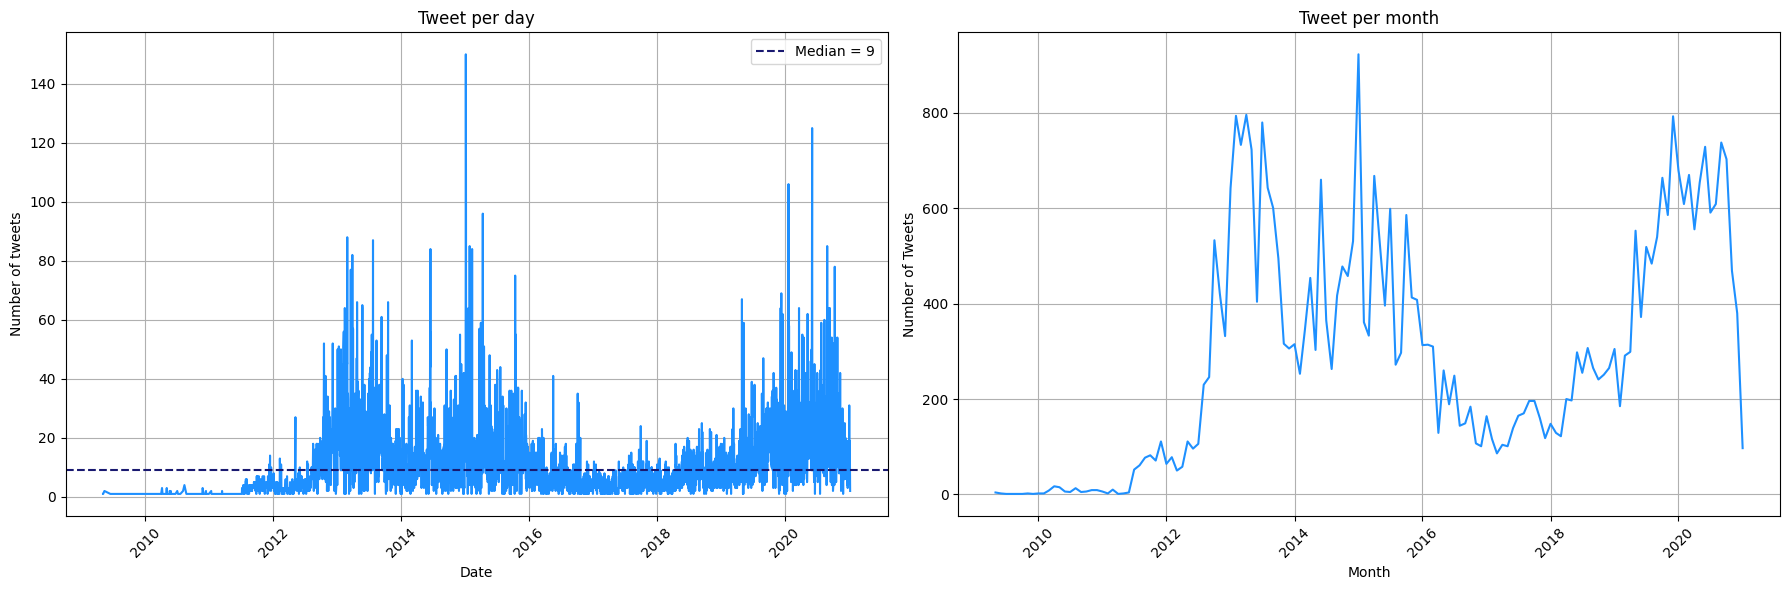

In [ ]:
tweets_per_day = df.groupby(df['date'].dt.date).size()
tweets_per_month = df.groupby(df['date'].dt.to_period('M')).size()

tweets_per_month.index = tweets_per_month.index.to_timestamp()


fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

sns.lineplot(x=tweets_per_day.index, y=tweets_per_day.values, ax=axes[0], color='dodgerblue')
axes[0].axhline(tweets_per_day.median(), color='midnightblue', linestyle='--', label=f'Median = {int(tweets_per_day.median())}')
axes[0].set_title('Tweet per day')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of tweets')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True)

sns.lineplot(x=tweets_per_month.index, y=tweets_per_month.values, ax=axes[1], color='dodgerblue')
axes[1].set_title('Tweet per month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Tweets')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()

<ipython-input-17-3927549873>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['date', 'Virality Category'])['id'].count().reset_index(name='Number of Tweets')


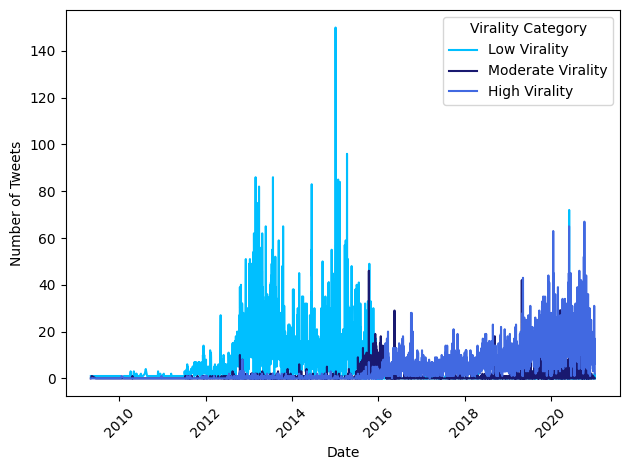

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Virality'] = df['retweets'] + 0.5 * df['favorites']
df['Virality Category'] = pd.cut(df['Virality'], bins=[-float('inf'), 2000, 6000, float('inf')], labels=['Low Virality', 'Moderate Virality', 'High Virality'])
data = df.groupby(['date', 'Virality Category'])['id'].count().reset_index(name='Number of Tweets')
data = data.rename(columns={'date': 'Date'})
palette = {'Low Virality': 'deepskyblue', 'Moderate Virality': 'midnightblue', 'High Virality': 'royalblue'}
sns.lineplot(data=data, x='Date', y='Number of Tweets', hue='Virality Category', palette=palette)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Sentiment Distribution**

<ipython-input-6-3320738864>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['deepskyblue', 'midnightblue', 'royalblue'])


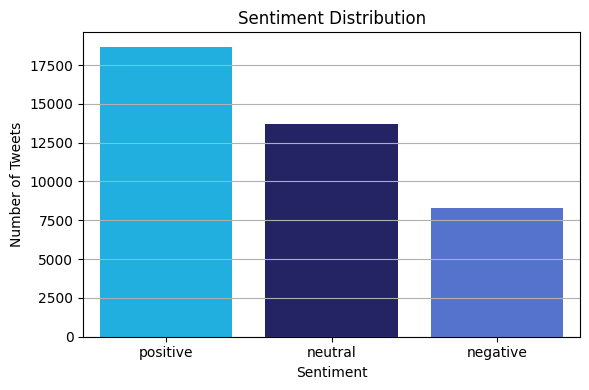

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['deepskyblue', 'midnightblue', 'royalblue'])
plt.title('Sentiment Distribution')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
positive,0.458937
neutral,0.336610
negative,0.204453


In [ ]:
print(f"Average probability for Pos. Prediction (>50%): {df[df['prob_positive'] > 0.5]['prob_positive'].mean()}")
print(f"Average probability for Neu. Prediction (>50%): {df[df['prob_neutral'] > 0.5]['prob_neutral'].mean()}")
print(f"Average probability for Neg. Prediction (>50%): {df[df['prob_negative'] > 0.5]['prob_negative'].mean()}")


Average probability for Pos. Prediction (>50%): 0.8285686385994512
Average probability for Neu. Prediction (>50%): 0.6508484329146655
Average probability for Neg. Prediction (>50%): 0.6593101918095089


In [ ]:
lower_bound = 0.35
upper_bound = 0.45

prob_cols = {
    'positive': 'prob_positive',
    'neutral': 'prob_neutral',
    'negative': 'prob_negative'
}

total_rows = df.shape[0]

for cls, prob_col in prob_cols.items():
    mask = (df[prob_col] >= lower_bound) & (df[prob_col] <= upper_bound) & (df['sentiment'] != cls)
    count = df[mask].shape[0]
    percent = (count / total_rows * 100) if total_rows > 0 else 0
    print(f"Class {cls.capitalize()} with probability 35%-45% but NOT predicted: {count} cases ({percent:.2f}%)")

ambiguous_mask = (
    ((df['prob_positive'] >= lower_bound) & (df['prob_positive'] <= upper_bound) & (df['sentiment'] != 'positive')) |
    ((df['prob_neutral'] >= lower_bound) & (df['prob_neutral'] <= upper_bound) & (df['sentiment'] != 'neutral')) |
    ((df['prob_negative'] >= lower_bound) & (df['prob_negative'] <= upper_bound) & (df['sentiment'] != 'negative'))
)

print("\nAmbiguous rows (probability 35%-45% for a class NOT predicted):")
print(df.loc[ambiguous_mask, ['prob_positive', 'prob_neutral', 'prob_negative', 'sentiment']])


Class Positive with probability 35%-45% but NOT predicted: 1832 cases (4.50%)
Class Neutral with probability 35%-45% but NOT predicted: 3336 cases (8.20%)
Class Negative with probability 35%-45% but NOT predicted: 1695 cases (4.17%)

Ambiguous rows (probability 35%-45% for a class NOT predicted):
       prob_positive  prob_neutral  prob_negative sentiment
0           0.084482      0.368305       0.547213  negative
4           0.427704      0.521108       0.051189   neutral
39          0.124136      0.472664       0.403199   neutral
42          0.364343      0.572770       0.062886   neutral
48          0.369460      0.532704       0.097836   neutral
...              ...           ...            ...       ...
56544       0.127804      0.455459       0.416737   neutral
56545       0.073835      0.530165       0.396000   neutral
56553       0.073835      0.530165       0.396000   neutral
56555       0.112285      0.509619       0.378096   neutral
56567       0.358037      0.593191       0

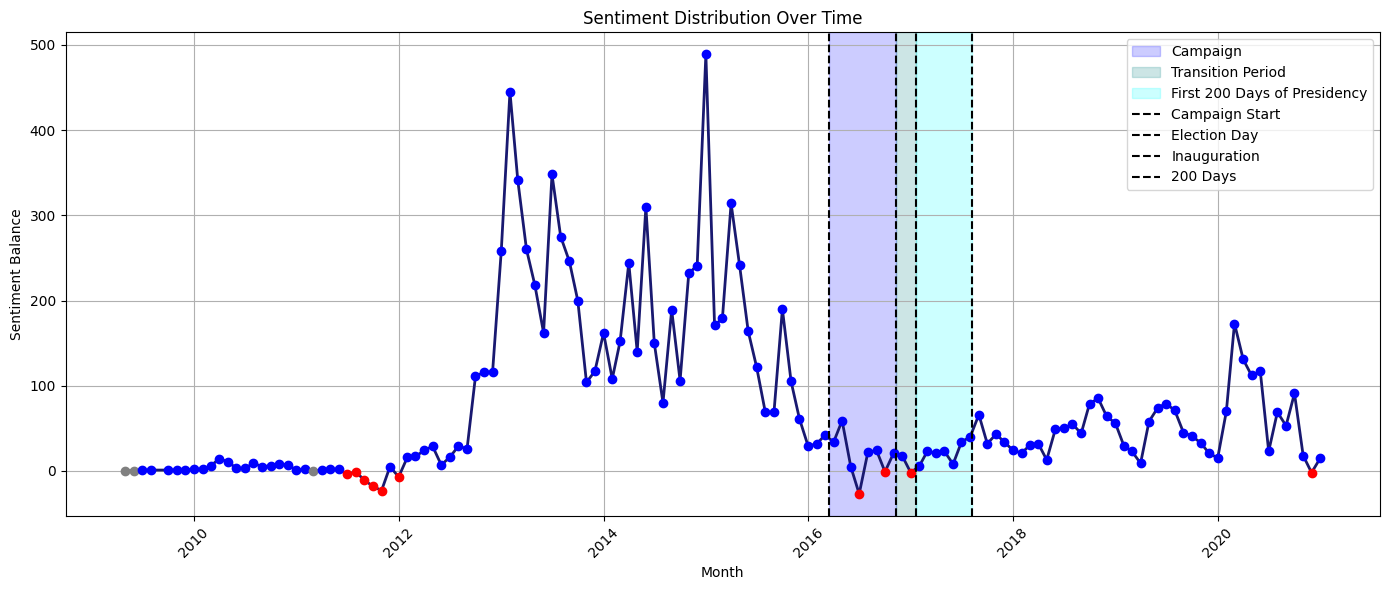

In [ ]:
sentiment_map = {'positive': 1, 'neutral': 0, 'negative': -1}
df['sentiment_score'] = df['sentiment'].map(sentiment_map)

monthly_sentiment = df.groupby(df['date'].dt.to_period('M'))['sentiment_score'].sum()
monthly_sentiment.index = monthly_sentiment.index.to_timestamp()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(monthly_sentiment.index, monthly_sentiment.values, color='midnightblue', linewidth=2)

for date, value in monthly_sentiment.items():
    if value > 0:
        plt.plot(date, value, 'o', color='blue')
    elif value < 0:
        plt.plot(date, value, 'o', color='red')
    else:
        plt.plot(date, value, 'o', color='grey')

election_date = pd.to_datetime('2016-11-08')
start_campaign = pd.to_datetime('2016-03-17')
election_day = pd.to_datetime('2016-11-08')
inauguration_day = pd.to_datetime('2017-01-20')
first_200_days_end = pd.to_datetime('2017-08-07')

plt.axvspan(start_campaign, election_day, color='blue', alpha=0.2, label='Campaign')
plt.axvspan(election_day, inauguration_day, color='teal', alpha=0.2, label='Transition Period')
plt.axvspan(inauguration_day, first_200_days_end, color='cyan', alpha=0.2, label='First 200 Days of Presidency')

for date, label in zip(
    [start_campaign, election_day, inauguration_day, first_200_days_end],
    ['Campaign Start', 'Election Day', 'Inauguration', '200 Days']
):
    plt.axvline(x=date, color='black', linestyle='--', label=label)

plt.title('Sentiment Distribution Over Time')
plt.xlabel('Month')
plt.ylabel('Sentiment Balance')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## **Statistical Analysis of Sentiment Distribution**

In [ ]:
df['period'] = df['date'].apply(lambda x: 'before' if x < pd.to_datetime('2016-11-08') else 'after')

In [ ]:
contingency_table = pd.crosstab(df['period'], df['sentiment'])

In [ ]:
contingency_table

sentiment,negative,neutral,positive
period,,,
after,4004,7314,6338
before,4316,6384,12338


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

if p < 0.05:
    print("❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.")
else:
    print("✅ No significant difference in the distribution of sentiment.")


Chi-squared: 1313.63
Degrees of freedom: 2
P-value: 5.616888536456259e-286
❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.


In [ ]:
(
    df.groupby('period')['sentiment']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .T
    .assign(percentage_difference=lambda x: (x['after'] - x['before']) * 100)
)

period,after,before,percentage_difference
sentiment,,,
negative,0.226778,0.187343,3.943578
neutral,0.414250,0.277107,13.714273
positive,0.358971,0.535550,-17.657851


<ipython-input-10-1505317845>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=colors, ax=ax)
<ipython-input-10-1505317845>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=colors, ax=ax)


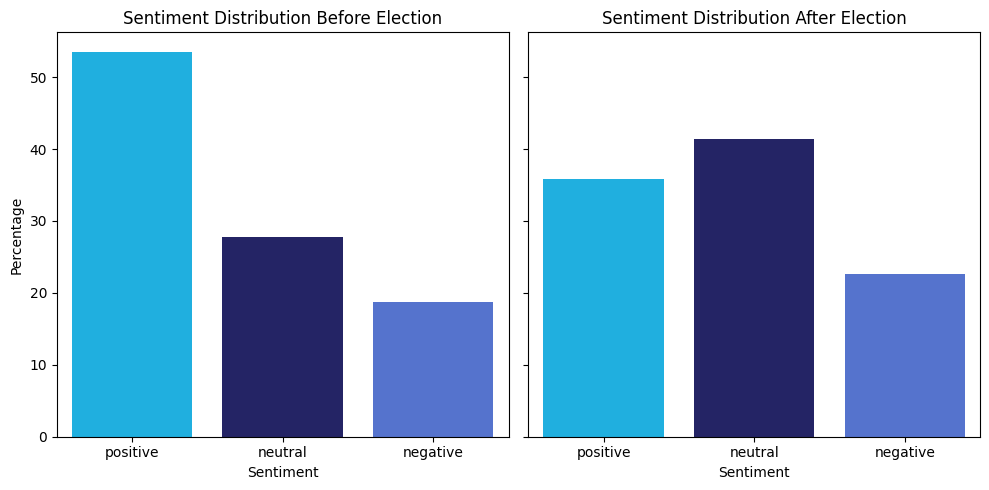

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = {'positive': 'deepskyblue', 'neutral': 'midnightblue', 'negative': 'royalblue'}
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

for ax, period, title in zip(axes, ['before', 'after'], ['Sentiment Distribution Before Election', 'Sentiment Distribution After Election']):
    data = df[df['period'] == period]['sentiment'].value_counts(normalize=True).reindex(colors.keys(), fill_value=0) * 100
    sns.barplot(x=data.index, y=data.values, palette=colors, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Percentage')

plt.tight_layout()
plt.show()

## **Word Frequencies**

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('punkt_tab')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def count_word_freq(text_series):
    stop_words = set(stopwords.words('english')).union({
        'rt', 'amp', 'realdonaldtrump', 'https', 'trump', 'donald', 'would', 'get'
    })

    all_words = []
    for text in text_series:
        cleaned = clean_text(text)
        words = re.findall(r'\b\w+\b', cleaned.lower())
        words = [word for word in words if word not in stop_words and len(word) > 2 and not word.isnumeric()]
        all_words.extend(words)

    return Counter(all_words)

In [ ]:
pd.DataFrame(count_word_freq(df['text']).items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)


,Word,Frequency
220,great,5732
55,president,3927
164,people,3005
1395,thanks,2087
173,country,1985
270,thank,1943
179,big,1880
679,like,1833
303,new,1795
197,one,1691


In [ ]:
# Positive
pd.DataFrame(count_word_freq(df[df['sentiment'] == 'positive']['text']).items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

,Word,Frequency
31,great,5206
585,thanks,2076
51,thank,1938
1,president,1665
13,good,1396
85,people,1314
78,america,1063
210,country,1050
25,big,1028
156,love,960


In [ ]:
# Negative
pd.DataFrame(count_word_freq(df[df['sentiment'] == 'negative']['text']).items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)


,Word,Frequency
63,people,906
154,never,725
447,bad,695
111,president,653
1,democrats,596
72,country,585
248,news,548
121,fake,525
252,many,481
271,like,479


In [ ]:
# Neutral
pd.DataFrame(count_word_freq(df[df['sentiment'] == 'neutral']['text']).items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)


,Word,Frequency
24,president,1609
122,people,785
244,democrats,692
67,obama,663
171,new,591
110,one,543
61,time,511
404,like,492
222,big,484
332,many,439


In [ ]:
pd.set_option('display.max_colwidth', None)
df[df['sentiment'] == 'neutral'].sort_values(by=['favorites', 'retweets'], ascending=False)['text'].head(30)

,text
2565,"71,000,000 legal votes. the most ever for a sitting president!"
53251,"aap rocky released from prison and on his way home to the united states from sweden. it was a rocky week, get home as soon as possible aap!"
8555,the united states of america will be designating antifa as a terrorist organization.
7831,china!
2578,since when does the lamestream media call who our next president will be? we have all learned a lot in the last two weeks!
2497,joe biden should not wrongfully claim the office of the president. i could make that claim also. legal proceedings are just now beginning!
2494,where are the missing military ballots in georgia? what happened to them?
753,"report dominion deleted 2.7 million trump votes nationwide. data analysis finds 221,000 pennsylvania votes switched from president trump to biden. 941,000 trump votes deleted. states using dominion voting systems switched 435,000 votes from trump to biden. chanelrion oann"
9505,"if you can protest in person, you can vote in person!"
2500,"i had such a big lead in all of these states late into election night, only to see the leads miraculously disappear as the days went by. perhaps these leads will return as our legal proceedings move forward!"


## **Sentiment Analysis using Fine-Grained Model**




---



In [ ]:
df = pd.read_csv('trump_tweets_with_sentiment_and_emotions.csv', parse_dates=['date'])

In [ ]:
df.head()

,Unnamed: 0,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral,emotion
0,0,9.845497e+16,republicans and democrats have both created our economic problems.,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305,neutral
1,1,1.234653e+18,"i was thrilled to be back in the great city of charlotte, north carolina with thousands of hardworking american patriots who love our country, cherish our values, respect our laws, and always put america first! thank you for a wonderful evening!! kag2020 [url]",False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323,admiration
2,2,1.218011e+18,rt cbsherridge read letter to surveillance court obtained by cbs news questions where there will be further disciplinary action and cho,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729,neutral
3,3,1.304875e+18,"the unsolicited mail in ballot scam is a major threat to our democracy, the democrats know it. almost all recent elections using this system, even though much smaller with far fewer ballots to count, have ended up being a disaster. large numbers of missing ballots fraud!",False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568,disappointment
4,4,1.218160e+18,rt mzhemingway very friendly telling of events here about comeys apparent leaking to compliant media. if you read those articles and though,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108,neutral


In [ ]:
df = df[~df['text'].str.contains(r'\[url\]', na=False)]

<ipython-input-17-1028056273>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emotion_dist = df.groupby('sentiment').apply(get_top_emotions).reset_index()


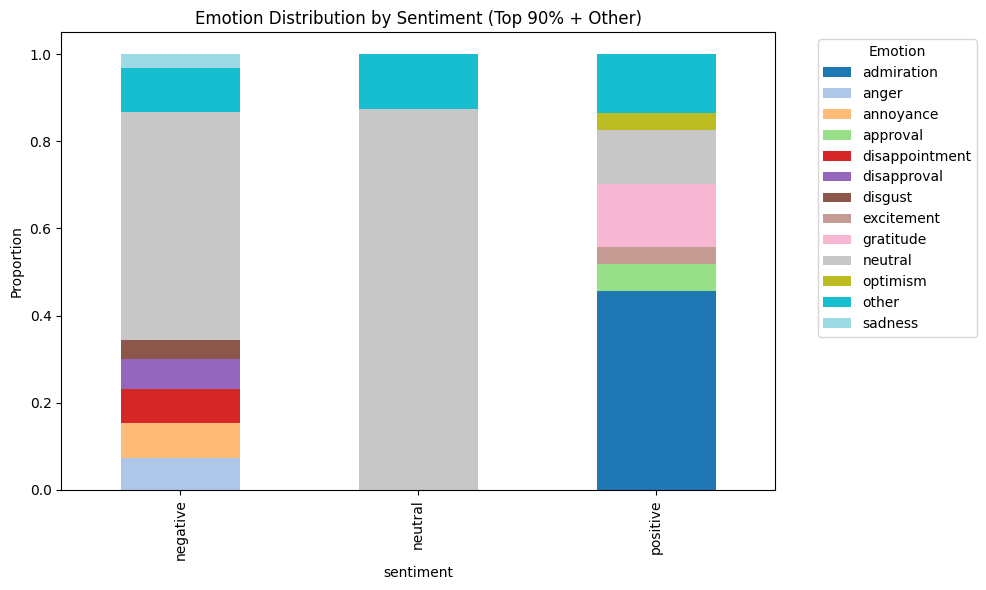

In [ ]:
import matplotlib.pyplot as plt

def get_top_emotions(group):
    counts = group['emotion'].value_counts(normalize=True)
    sorted_counts = counts.sort_values(ascending=False)
    cum_perc = sorted_counts.cumsum()

    mask = cum_perc <= 0.9

    if mask.sum() == 0:
        mask.iloc[0] = True

    top = sorted_counts[mask]
    other = 1 - top.sum()
    result = pd.concat([top, pd.Series({'other': other})])
    return result

emotion_dist = df.groupby('sentiment').apply(get_top_emotions).reset_index()
emotion_dist.columns = ['sentiment', 'emotion', 'percent']

pivot = emotion_dist.pivot(index='sentiment', columns='emotion', values='percent').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.ylabel('Proportion')
plt.title('Emotion Distribution by Sentiment (Top 90% + Other)')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40694 entries, 0 to 56569
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     40694 non-null  int64         
 1   id             40694 non-null  float64       
 2   text           40694 non-null  object        
 3   is_retweet     40694 non-null  bool          
 4   is_deleted     40694 non-null  bool          
 5   device         40694 non-null  object        
 6   favorites      40694 non-null  int64         
 7   retweets       40694 non-null  int64         
 8   datetime       40694 non-null  object        
 9   is_flagged     40694 non-null  bool          
 10  date           40694 non-null  datetime64[ns]
 11  sentiment      40694 non-null  object        
 12  prob_positive  40694 non-null  float64       
 13  prob_negative  40694 non-null  float64       
 14  prob_neutral   40694 non-null  float64       
 15  emotion        40694 non

In [ ]:
top5_emotions = (
    df[df['sentiment'] == 'neutral']['emotion']
    .value_counts(normalize=True)
    .mul(100)
    .head(5)
    .round(2)
    .reset_index(name='Percentage')
    .rename(columns={'index': 'Emotion'})
)

In [ ]:
top5_emotions

,emotion,Percentage
0,neutral,87.45
1,curiosity,3.85
2,admiration,2.57
3,approval,2.15
4,caring,1.08


In [ ]:
df['period'] = df['date'].apply(lambda x: 'before' if x < pd.to_datetime('2016-11-08') else 'after')

<ipython-input-9-2061706599>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-2061706599>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


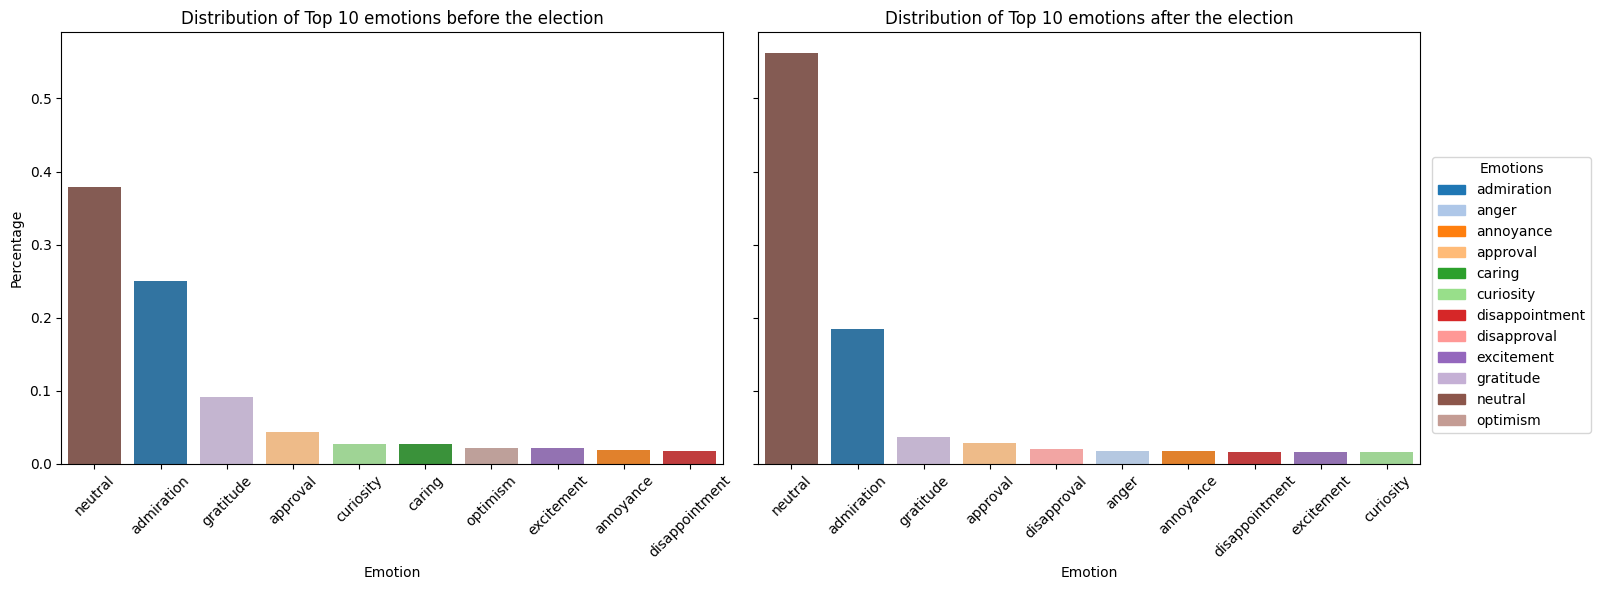

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

emotions = sorted(set(
    df[df['period'] == 'before']['emotion'].value_counts(normalize=True).head(10).index
).union(
    df[df['period'] == 'after']['emotion'].value_counts(normalize=True).head(10).index
))
colors = dict(zip(emotions, sns.color_palette("tab20", len(emotions))))

sns.barplot(
    x=list(df[df['period'] == 'before']['emotion'].value_counts(normalize=True).head(10).index),
    y=list(df[df['period'] == 'before']['emotion'].value_counts(normalize=True).head(10).values),
    palette=[colors[e] for e in df[df['period'] == 'before']['emotion'].value_counts(normalize=True).head(10).index],
    ax=axes[0]
)
axes[0].set_title("Distribution of Top 10 emotions before the election")
axes[0].set_xlabel("Emotion")
axes[0].set_ylabel("Percentage")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    x=list(df[df['period'] == 'after']['emotion'].value_counts(normalize=True).head(10).index),
    y=list(df[df['period'] == 'after']['emotion'].value_counts(normalize=True).head(10).values),
    palette=[colors[e] for e in df[df['period'] == 'after']['emotion'].value_counts(normalize=True).head(10).index],
    ax=axes[1]
)
axes[1].set_title("Distribution of Top 10 emotions after the election")
axes[1].set_xlabel("Emotion")
axes[1].tick_params(axis='x', rotation=45)

fig.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, color=colors[e]) for e in emotions],
    labels=emotions,
    loc='center right',
    title='Emotions'
)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


In [ ]:
df[df['period'] == 'before']['emotion'].value_counts(normalize=True).mul(100).head(10).round(2).reset_index(name='Percentage').rename(columns={'index': 'Emotion'})


,emotion,Percentage
0,neutral,37.91
1,admiration,24.98
2,gratitude,9.07
3,approval,4.28
4,curiosity,2.71
5,caring,2.67
6,optimism,2.17
7,excitement,2.15
8,annoyance,1.84
9,disappointment,1.77


In [ ]:
df[df['period'] == 'after']['emotion'].value_counts(normalize=True).mul(100).head(10).round(2).reset_index(name='Percentage').rename(columns={'index': 'Emotion'})


,emotion,Percentage
0,neutral,56.24
1,admiration,18.41
2,gratitude,3.65
3,approval,2.88
4,disapproval,1.99
5,anger,1.79
6,annoyance,1.78
7,disappointment,1.63
8,excitement,1.59
9,curiosity,1.58


In [ ]:
contingency_table = pd.crosstab(df['period'], df['emotion'])

In [ ]:
contingency_table

emotion,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,neutral,optimism,pride,realization,relief,remorse,sadness,surprise
period,,,,,,,,,,,,,,,,,,,,,
after,3250,77,316,315,508,246,37,279,40,287,...,68,2,9930,269,0,9,0,20,104,100
before,5756,213,343,423,985,616,63,624,170,407,...,354,7,8733,501,1,31,1,32,173,123


In [ ]:
change = (df[df['period'] == 'after']['emotion'].value_counts(normalize=True).mul(100) - df[df['period'] == 'before']['emotion'].value_counts(normalize=True).mul(100)).round(2)

top_10_emotions = change.abs().sort_values(ascending=False).head(10).index

change.loc[top_10_emotions]


,proportion
emotion,
neutral,18.33
admiration,-6.58
gratitude,-5.42
approval,-1.40
caring,-1.28
love,-1.15
curiosity,-1.13
disapproval,0.76
optimism,-0.65


In [ ]:
neg_cols = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"
]

pos_cols = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief"
]

neu_cols = ["confusion", "realization", "surprise", "neutral"]

positive_change = change[change.index.isin(pos_cols)].sum()
negative_change = change[change.index.isin(neg_cols)].sum()
neutral_change = change[change.index.isin(neu_cols)].sum()

top_5_positive = change[change.index.isin(pos_cols)].reindex(change[change.index.isin(pos_cols)].abs().sort_values(ascending=False).head(5).index)
top_5_negative = change[change.index.isin(neg_cols)].reindex(change[change.index.isin(neg_cols)].abs().sort_values(ascending=False).head(5).index)

print(f"Positive change: {positive_change:.2f}")
print(f"Negative change: {negative_change:.2f}")
print(f"Neutral change: {neutral_change:.2f}")

print("\nTop 5 Positive Emotions by Change:")
print(top_5_positive)

print("\nTop 5 Negative Emotions by Change:")
print(top_5_negative)

Positive change: -19.17
Negative change: 0.94
Neutral change: 18.22

Top 5 Positive Emotions by Change:
emotion
admiration   -6.58
gratitude    -5.42
approval     -1.40
caring       -1.28
love         -1.15
Name: proportion, dtype: float64

Top 5 Negative Emotions by Change:
emotion
disapproval       0.76
disgust           0.40
anger             0.30
sadness          -0.16
disappointment   -0.14
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

if p < 0.05:
    print("❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.")
else:
    print("✅ No significant difference in the distribution of sentiment.")

Chi-squared: 1885.87
Degrees of freedom: 26
P-value: 0.0
❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.


## **Sentiment Analysis using Fine-Grained Model (No Neutral)**

In [ ]:
df_no_neutral = pd.read_csv('trump_tweets_with_sentiment_and_emotions (no neutral).csv', parse_dates=['date'])

In [ ]:
df_no_neutral.head()

,Unnamed: 0,id,text,is_retweet,is_deleted,device,favorites,retweets,datetime,is_flagged,date,sentiment,prob_positive,prob_negative,prob_neutral,emotion
0,0,9.845497e+16,republicans and democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02T18:07:48Z,False,2011-08-02,negative,0.084482,0.547213,0.368305,disappointment
1,1,1.234653e+18,i was thrilled to be back in the great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03T01:34:50Z,False,2020-03-03,positive,0.965391,0.005286,0.029323,admiration
2,2,1.218011e+18,rt cbsherridge read letter to surveillance cou...,True,False,Twitter for iPhone,0,7396,2020-01-17T03:22:47Z,False,2020-01-17,neutral,0.085382,0.223889,0.690729,annoyance
3,3,1.304875e+18,the unsolicited mail in ballot scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12T20:10:58Z,False,2020-09-12,negative,0.068932,0.701500,0.229568,disappointment
4,4,1.218160e+18,rt mzhemingway very friendly telling of events...,True,False,Twitter for iPhone,0,9081,2020-01-17T13:13:59Z,False,2020-01-17,neutral,0.427704,0.051189,0.521108,admiration


In [ ]:
df_no_neutral = df_no_neutral[~df_no_neutral['text'].str.contains(r'\[url\]', na=False)]

<ipython-input-15-a6a05dd28d65>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  emotion_dist = df_no_neutral.groupby('sentiment').apply(get_top_emotions).reset_index()


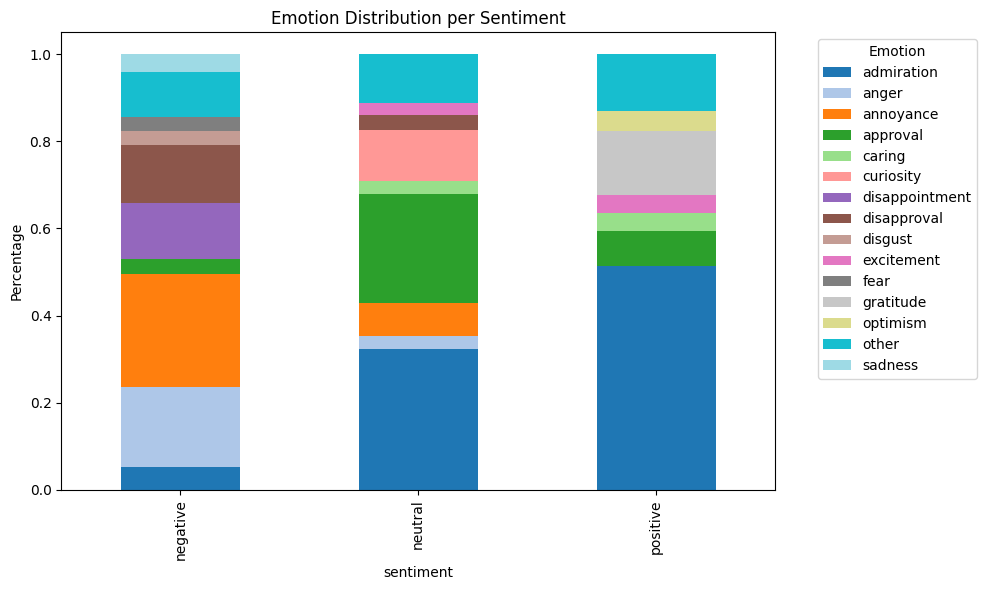

In [ ]:
import matplotlib.pyplot as plt


def get_top_emotions(group):
    counts = group['emotion'].value_counts(normalize=True)
    sorted_counts = counts.sort_values(ascending=False)
    cum_perc = sorted_counts.cumsum()


    mask = cum_perc <= 0.9


    if mask.sum() == 0:
        mask.iloc[0] = True

    top = sorted_counts[mask]
    other = 1 - top.sum()
    result = pd.concat([top, pd.Series({'other': other})])
    return result



emotion_dist = df_no_neutral.groupby('sentiment').apply(get_top_emotions).reset_index()
emotion_dist.columns = ['sentiment', 'emotion', 'percent']


pivot = emotion_dist.pivot(index='sentiment', columns='emotion', values='percent').fillna(0)


pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.ylabel('Percentage')
plt.title('Emotion Distribution per Sentiment')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pd.set_option('display.max_rows', 500)
df_no_neutral.groupby('sentiment')['emotion'].value_counts(normalize=True)

sentiment  emotion       
negative   annoyance         0.257212
           anger             0.183654
           disapproval       0.134375
           disappointment    0.128486
           admiration        0.053486
           sadness           0.040024
           approval          0.035216
           disgust           0.031250
           fear              0.031010
           curiosity         0.030649
           caring            0.014663
           embarrassment     0.012139
           confusion         0.010096
           remorse           0.008894
           surprise          0.006851
           amusement         0.005048
           desire            0.004928
           optimism          0.004447
           realization       0.003365
           nervousness       0.002043
           gratitude         0.000721
           excitement        0.000601
           joy               0.000481
           love              0.000240
           grief             0.000120
neutral    admiration        0.323113
           approval          0.249525
           curiosity         0.117900
           annoyance         0.075850
           disapproval       0.034677
           anger             0.030807
           caring            0.028617
           excitement        0.026938
           disappointment    0.021901
           optimism          0.021828
           confusion         0.015331
           surprise          0.014528
           desire            0.013141
           realization       0.012703
           fear              0.003577
           sadness           0.003504
           amusement         0.002628
           joy               0.000803
           love              0.000803
           gratitude         0.000730
           remorse           0.000365
           disgust           0.000292
           nervousness       0.000219
           relief            0.000146
           grief             0.000073
positive   admiration        0.513333
           gratitude         0.146659
           approval          0.079835
           optimism          0.046477
           caring            0.041497
           excitement        0.041497
           joy               0.032020
           love              0.023827
           desire            0.017723
           curiosity         0.016385
           amusement         0.015796
           annoyance         0.007175
           anger             0.005622
           disappointment    0.003213
           disapproval       0.002945
           sadness           0.001606
           surprise          0.001124
           fear              0.000857
           disgust           0.000750
           confusion         0.000482
           realization       0.000428
           remorse           0.000375
           embarrassment     0.000214
           pride             0.000161
Name: proportion, dtype: float64

In [ ]:
(df_no_neutral.loc[df['emotion'] == 'neutral', 'emotion'].value_counts(normalize=True) * 100).round(2)

,proportion
emotion,
admiration,28.03
approval,20.75
annoyance,12.71
curiosity,6.89
anger,6.82
disapproval,6.07
disappointment,4.31
excitement,2.43
optimism,2.41


In [ ]:
top5_emotions = (
    df_no_neutral[df_no_neutral['sentiment'] == 'neutral']['emotion']
    .value_counts(normalize=True)
    .mul(100)
    .head(5)
    .round(2)
    .reset_index(name='Percentage')
    .rename(columns={'index': 'Emotion'})
)

In [ ]:
top5_emotions

,emotion,Percentage
0,admiration,32.31
1,approval,24.95
2,curiosity,11.79
3,annoyance,7.59
4,disapproval,3.47


In [ ]:
neg_cols = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"
]

pos_cols = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief"
]

emotion_perc = (
    df_no_neutral.loc[df['emotion'] == 'neutral', 'emotion']
    .value_counts(normalize=True) * 100
)

positive_sum = emotion_perc[emotion_perc.index.isin(pos_cols)].sum()
negative_sum = emotion_perc[emotion_perc.index.isin(neg_cols)].sum()

# Display result
print(f"Positive: {positive_sum:.2f}%")
print(f"Negative: {negative_sum:.2f}%")

Positive: 65.53%
Negative: 32.05%


In [ ]:
df_no_neutral['period'] = df_no_neutral['date'].apply(lambda x: 'before' if x < pd.to_datetime('2016-11-08') else 'after')

In [ ]:
df_no_neutral[df_no_neutral['period'] == 'before']['emotion'].value_counts(normalize=True).mul(100).head(10).round(2).reset_index(name='Percentage').rename(columns={'index': 'Emotion'})


,emotion,Percentage
0,admiration,36.84
1,approval,11.01
2,gratitude,9.18
3,annoyance,6.27
4,curiosity,5.83
5,caring,3.99
6,anger,3.90
7,disappointment,3.36
8,optimism,3.16
9,excitement,3.10


In [ ]:
df_no_neutral[df_no_neutral['period'] == 'after']['emotion'].value_counts(normalize=True).mul(100).head(10).round(2).reset_index(name='Percentage').rename(columns={'index': 'Emotion'})

,emotion,Percentage
0,admiration,33.81
1,approval,15.10
2,annoyance,10.58
3,anger,6.55
4,disapproval,5.40
5,curiosity,4.72
6,disappointment,3.71
7,gratitude,3.62
8,optimism,2.70
9,excitement,2.46


In [ ]:
contingency_table = pd.crosstab(df_no_neutral['period'], df_no_neutral['emotion'])

In [ ]:
contingency_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, after to before
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   admiration      2 non-null      int64
 1   amusement       2 non-null      int64
 2   anger           2 non-null      int64
 3   annoyance       2 non-null      int64
 4   approval        2 non-null      int64
 5   caring          2 non-null      int64
 6   confusion       2 non-null      int64
 7   curiosity       2 non-null      int64
 8   desire          2 non-null      int64
 9   disappointment  2 non-null      int64
 10  disapproval     2 non-null      int64
 11  disgust         2 non-null      int64
 12  embarrassment   2 non-null      int64
 13  excitement      2 non-null      int64
 14  fear            2 non-null      int64
 15  gratitude       2 non-null      int64
 16  grief           2 non-null      int64
 17  joy             2 non-null      int64
 18  love            2 non-null    

In [ ]:
change = (df_no_neutral[df_no_neutral['period'] == 'after']['emotion'].value_counts(normalize=True).mul(100) - df_no_neutral[df_no_neutral['period'] == 'before']['emotion'].value_counts(normalize=True).mul(100)).round(2)
top_10_emotions = change.abs().sort_values(ascending=False).head(10).index

change.loc[top_10_emotions]

,proportion
emotion,
gratitude,-5.56
annoyance,4.31
approval,4.09
admiration,-3.03
anger,2.65
disapproval,2.39
caring,-1.90
love,-1.19
curiosity,-1.11


In [ ]:
(
    pd.DataFrame({
        'Percentage Before': df_no_neutral[df_no_neutral['period'] == 'before']['emotion']
            .value_counts(normalize=True).mul(100)
            .round(2)
            .reindex(
                (df_no_neutral[df_no_neutral['period'] == 'after']['emotion']
                    .value_counts(normalize=True).mul(100)
                 - df_no_neutral[df_no_neutral['period'] == 'before']['emotion']
                    .value_counts(normalize=True).mul(100)
                ).abs().sort_values(ascending=False).head(10).index
            ),
        'Percentage After': df_no_neutral[df_no_neutral['period'] == 'after']['emotion']
            .value_counts(normalize=True).mul(100)
            .round(2)
            .reindex(
                (df_no_neutral[df_no_neutral['period'] == 'after']['emotion']
                    .value_counts(normalize=True).mul(100)
                 - df_no_neutral[df_no_neutral['period'] == 'before']['emotion']
                    .value_counts(normalize=True).mul(100)
                ).abs().sort_values(ascending=False).head(10).index
            ),
        'Percentage Change': (
            df_no_neutral[df_no_neutral['period'] == 'after']['emotion']
            .value_counts(normalize=True).mul(100)
            - df_no_neutral[df_no_neutral['period'] == 'before']['emotion']
            .value_counts(normalize=True).mul(100)
        ).round(2).reindex(
            (df_no_neutral[df_no_neutral['period'] == 'after']['emotion']
                .value_counts(normalize=True).mul(100)
             - df_no_neutral[df_no_neutral['period'] == 'before']['emotion']
                .value_counts(normalize=True).mul(100)
            ).abs().sort_values(ascending=False).head(10).index
        )
    })
)


,Percentage Before,Percentage After,Percentage Change
emotion,,,
gratitude,9.18,3.62,-5.56
annoyance,6.27,10.58,4.31
approval,11.01,15.10,4.09
admiration,36.84,33.81,-3.03
anger,3.90,6.55,2.65
disapproval,3.01,5.40,2.39
caring,3.99,2.09,-1.90
love,1.64,0.45,-1.19
curiosity,5.83,4.72,-1.11


In [ ]:
df_no_neutral['is_retweet'].value_counts(normalize=True)

,proportion
is_retweet,
False,0.825576
True,0.174424


In [ ]:
df_no_neutral.loc[(df['emotion'] == 'neutral') & (df_no_neutral['emotion'] == 'admiration'), 'is_retweet'].value_counts(normalize=True)

,proportion
is_retweet,
False,0.624355
True,0.375645


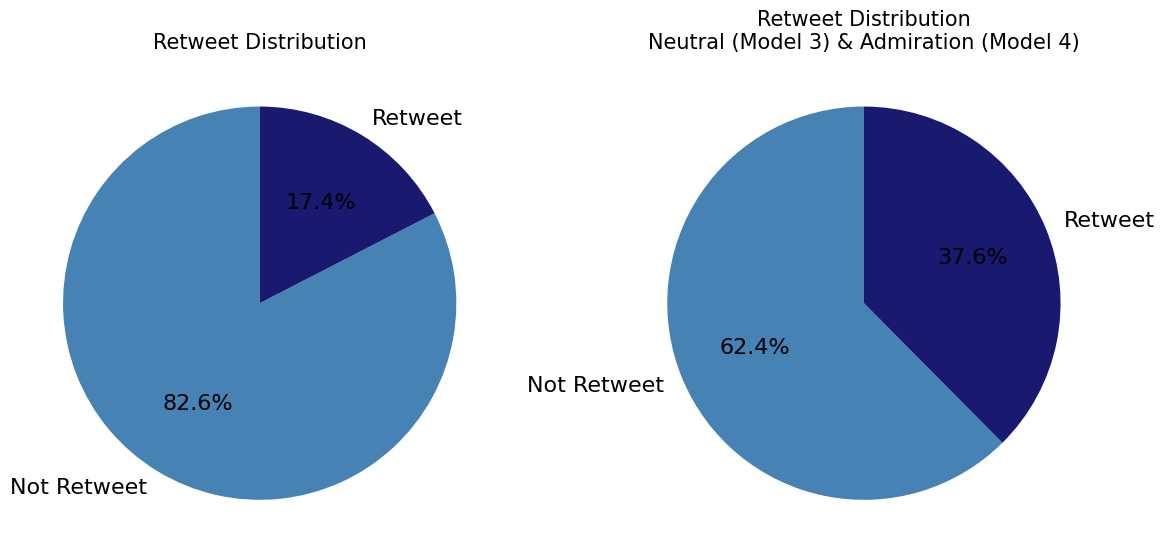

In [ ]:
import matplotlib.pyplot as plt

colors = ['steelblue', 'midnightblue']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    df_no_neutral['is_retweet'].value_counts(normalize=True),
    labels=df_no_neutral['is_retweet'].value_counts(normalize=True).index.map({False: 'Not Retweet', True: 'Retweet'}),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 16}
)
axes[0].set_title("Retweet Distribution", fontsize=15)


axes[1].pie(
    df_no_neutral.loc[(df['emotion'] == 'neutral') & (df_no_neutral['emotion'] == 'admiration'), 'is_retweet'].value_counts(normalize=True),
    labels=df_no_neutral.loc[(df['emotion'] == 'neutral') & (df_no_neutral['emotion'] == 'admiration'), 'is_retweet'].value_counts(normalize=True).index.map({False: 'Not Retweet', True: 'Retweet'}),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 16}
)
axes[1].set_title("Retweet Distribution\nNeutral (Model 3) & Admiration (Model 4)", fontsize=15)

plt.tight_layout()
plt.show()


In [ ]:
df[df['is_retweet'] == True]['emotion'].value_counts(normalize=True).head(5)

,proportion
emotion,
neutral,0.754861
admiration,0.111158
gratitude,0.032544
approval,0.018879
caring,0.010003


In [ ]:
df_no_neutral[df_no_neutral['is_retweet'] == True]['emotion'].value_counts(normalize=True).head(5)

,proportion
emotion,
admiration,0.391237
approval,0.193998
annoyance,0.087349
curiosity,0.044942
anger,0.044379


In [ ]:
neg_cols = [
    "anger", "annoyance", "disappointment", "disapproval", "disgust",
    "embarrassment", "fear", "grief", "nervousness", "remorse", "sadness"
]

pos_cols = [
    "admiration", "amusement", "approval", "caring", "curiosity", "desire",
    "excitement", "gratitude", "joy", "love", "optimism", "pride", "relief"
]


positive_change = change[change.index.isin(pos_cols)].sum()
negative_change = change[change.index.isin(neg_cols)].sum()


top_5_positive = change[change.index.isin(pos_cols)].reindex(change[change.index.isin(pos_cols)].abs().sort_values(ascending=False).head(5).index)
top_5_negative = change[change.index.isin(neg_cols)].reindex(change[change.index.isin(neg_cols)].abs().sort_values(ascending=False).head(5).index)


print(f"Positive change: {positive_change:.2f}")
print(f"Negative change: {negative_change:.2f}")



print("\nTop 5 Positive Emotions by Change:")
print(top_5_positive)

print("\nTop 5 Negative Emotions by Change:")
print(top_5_negative)

Positive change: -11.01
Negative change: 10.12

Top 5 Positive Emotions by Change:
emotion
gratitude    -5.56
approval      4.09
admiration   -3.03
caring       -1.90
love         -1.19
Name: proportion, dtype: float64

Top 5 Negative Emotions by Change:
emotion
annoyance         4.31
anger             2.65
disapproval       2.39
disappointment    0.35
fear              0.28
Name: proportion, dtype: float64


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")
print("P-value:", p)

if p < 0.05:
    print("❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.")
else:
    print("✅ No significant difference in the distribution of sentiment.")

Chi-squared: 1539.52
Degrees of freedom: 26
P-value: 4.56813557213916e-309
❗ There is a significant difference in the distribution of sentiment before and after November 8, 2016.


## **Manual Review**



In [ ]:
df_sample_balanced = pd.concat(
    [g.sample(n=min(len(g), 200), random_state=42)
     for _, g in df_no_neutral.groupby('sentiment')]
).sample(n=200, random_state=42)


In [ ]:
df_sample_balanced['sentiment'].value_counts(normalize=True)

,proportion
sentiment,
negative,0.360
positive,0.335
neutral,0.305


In [ ]:
from google.colab import files
df_sample_balanced.to_excel("sample_tweets.xlsx", index=False)
files.download("sample_tweets.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_sample_balanced = pd.read_excel('sample_tweets.xlsx')

In [ ]:
print(df_sample_balanced.iloc[7]['text'])

....it is done. these places need your help badly, you cannot leave fast enough. i am sure that nancy pelosi would be very happy to quickly work out free travel arrangements!


  0%|          | 0/498 [00:00<?, ?it/s]

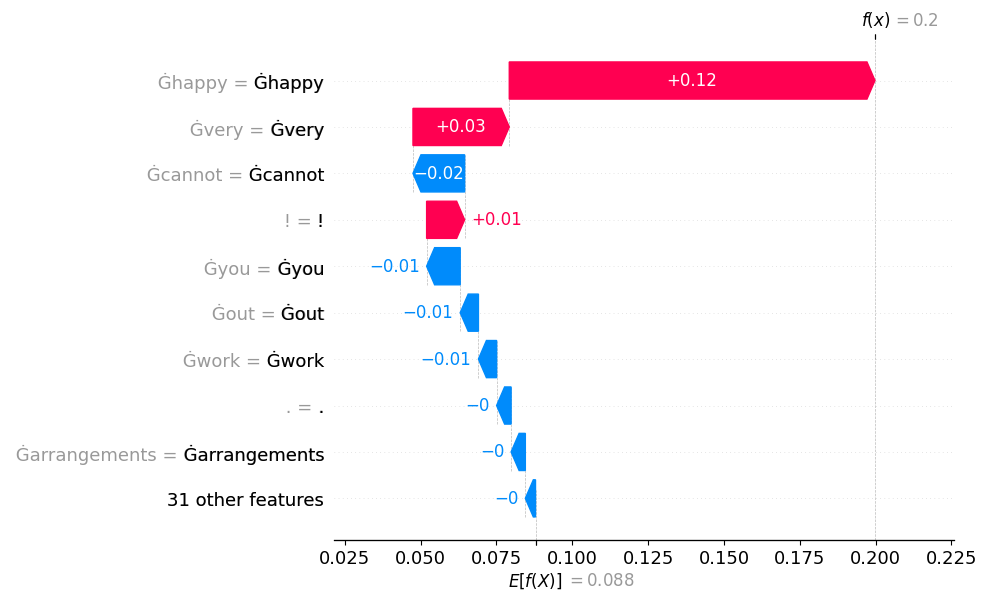

In [ ]:
tweet = df_sample_balanced.iloc[7]['text']

shap_values = explainer([tweet])

shap.plots.waterfall(shap_values[0][:, 0])

In [ ]:
print(df_sample_balanced.iloc[72]['text'])

remember when i said when saddam hussein fell  the new leader of iraq will be meaner and tougher and hate the you.s. even more. welcome isis!


  0%|          | 0/498 [00:00<?, ?it/s]

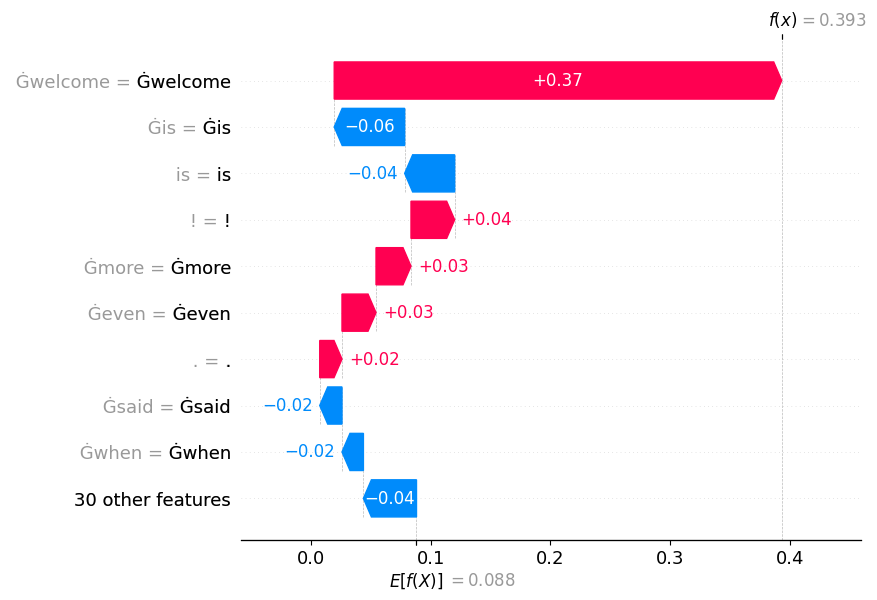

In [ ]:
tweet = df_sample_balanced.iloc[72]['text']

shap_values = explainer([tweet])

shap.plots.waterfall(shap_values[0][:, 0])